# A faire

- Vérifier qu'on peut bien tracer des moyennes, et si oui, comment sont-elles calculées ? Comprendre les méthodes directes et indirectes...
- VERIFIER ABSOLUMENT la fonction de groupage
=> écrire un mail pour ces deux éléments?

# Points sur les biostats/épidémio 

- Prévalence : cas présents ou passés / population exposée à une date donnée (image à une date t)
- Incidence : nombre de nouveaux cas de cette maladie observés sur une période donnée (vitesse d'apparition d'une maladie)
- Taux standardisés : éliminet les effets liés à des "facteurs de confusion" (âge, sexe, ...)
    - Standardisation directe : 
    - Standardisation indirecte : 

# Lien vers les données :
- Inégalités sociales face aux maladies chroniques : https://data.drees.solidarites-sante.gouv.fr/explore/dataset/er_inegalites_maladies_chroniques/information/

- Nombre de médecins par région : https://www.insee.fr/fr/statistiques/2012677#tableau-TCRD_068_tab1_regions2016

- Nb de psychiatres par région : https://drees.shinyapps.io/demographie-ps/

# Installations

In [2]:
!pip install geopandas
!pip install contextily
!pip install xlrd

<<<<<<< local


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 12.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 14.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.9 MB/s eta 0:00:00


>>>>>>> remote


# Packages

In [3]:
import requests
import pandas as pd
import io

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from IPython.display import HTML

import geopandas as gpd
import contextily as ctx

import urllib


In [3]:
dico_grpes_sociopro = {
    '1' : 'Agriculteurs exploitants',
    '2' : 'Artisans, commerçants, chefs d\'entreprise',
    '3' : 'Cadres et professions intellectuelles supérieures',
    '4' : 'Professions intermédiaires',
    '5' : 'Employés',
    '6' : 'Ouvriers',
    '7' : 'Retraités',
    '8' : 'Autres'
}

# Importation des tables & Premières stat des sur les maladies chroniques

## Importation : Inégalités sociales face aux maladies chroniques (ER 1243)

In [4]:
url_drees = "https://data.drees.solidarites-sante.gouv.fr/explore/dataset/er_inegalites_maladies_chroniques/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"

urlData = requests.get(url_drees).content
df_drees = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep = ";")
df_drees.head(3)

type          varTaux                                     varTauxLib  \
0  prevalence   TOP_CVAOMI_IND  Artériopathie oblitérante du membre inférieur   
1  prevalence  TOP_CVCORON_CHR                    Maladie coronaire chronique   
2  prevalence  TOP_CVVALVE_IND                             Maladie valvulaire   

   I_cat         cat                           catLib varPartition  \
0      0  SUP_CV_CAT  Maladies cardioneurovasculaires   FISC_REG_S   
1      0  SUP_CV_CAT  Maladies cardioneurovasculaires   FISC_REG_S   
2      0  SUP_CV_CAT  Maladies cardioneurovasculaires   FISC_REG_S   

  valPartition                  varGroupage valGroupage        varPoids  \
0           76  FISC_NIVVIEM_E2015_S_moy_10           1  POIDS_FIDELI_S   
1           76  FISC_NIVVIEM_E2015_S_moy_10           1  POIDS_FIDELI_S   
2           76  FISC_NIVVIEM_E2015_S_moy_10           1  POIDS_FIDELI_S   

         poids1      poidsTot  txNonStand  txStandDir  txStandDirModBB  \
0  13621.000499  1.374418e+06    0.009910    0.014240         0.013046   
1  30886.502030  1.374418e+06    0.022472    0.031912         0.030194   
2   6482.669891  1.374418e+06    0.004717    0.006956         0.006101   

   txStandDirModBH  txStandIndir  txStandIndirModBB  txStandIndirModBH  
0         0.015435      0.014738           0.013555           0.015921  
1         0.033631      0.033026           0.031317           0.034736  
2         0.007810      0.007021           0.006193           0.007848

## Pour comprendre la structure de la table :

In [5]:
list(set(df_drees['type']))

['prevalence', 'incidence']

In [6]:
list(set(df_drees['varPartition']))

['SEXE', 'FISC_REG_S', nan]

In [7]:
list(set(df_drees['varGroupage']))

['EAR_GS_S',
 'EAR_DIPLR_S',
 'classeAge10',
 'SEXE',
 nan,
 'FISC_NIVVIEM_E2015_S_moy_10']

In [8]:
list(df_drees.columns)

['type',
 'varTaux',
 'varTauxLib',
 'I_cat',
 'cat',
 'catLib',
 'varPartition',
 'valPartition',
 'varGroupage',
 'valGroupage',
 'varPoids',
 'poids1',
 'poidsTot',
 'txNonStand',
 'txStandDir',
 'txStandDirModBB',
 'txStandDirModBH',
 'txStandIndir',
 'txStandIndirModBB',
 'txStandIndirModBH']

In [9]:
df_drees.describe()

I_cat        poids1      poidsTot    txNonStand    txStandDir  \
count  46176.000000  4.617200e+04  4.617200e+04  46172.000000  46172.000000   
mean       0.211538  4.084664e+04  3.306689e+06      0.015083      0.014951   
std        0.408404  1.788971e+05  5.607415e+06      0.037744      0.037236   
min        0.000000  0.000000e+00  4.365972e+02      0.000000      0.000000   
25%        0.000000  3.513649e+02  3.640001e+05      0.000570      0.000576   
50%        0.000000  2.614705e+03  9.753148e+05      0.002697      0.002720   
75%        0.000000  1.636898e+04  3.640875e+06      0.011545      0.011624   
max        1.000000  6.070514e+06  4.773171e+07      0.588601      0.588512   

       txStandDirModBB  txStandDirModBH  txStandIndir  txStandIndirModBB  \
count     46172.000000     46172.000000  45794.000000       45794.000000   
mean          0.013526         0.016377      0.014984           0.013608   
std           0.035579         0.039294      0.037206           0.035653   
min          -0.046276         0.000000      0.000000          -0.057530   
25%           0.000209         0.000841      0.000598           0.000244   
50%           0.001930         0.003485      0.002767           0.001986   
75%           0.009733         0.013296      0.011734           0.009851   
max           0.580976         0.678644      0.590223           0.580827   

       txStandIndirModBH  
count       45794.000000  
mean            0.016359  
std             0.039123  
min             0.000000  
25%             0.000869  
50%             0.003504  
75%             0.013414  
max             0.708820

## Fonction annexe qui récupère un sous-domaine pour étude

In [10]:
def selection_variable_barplot(liste_var_groupage, liste_var_partition, type_var_groupage = float, type_var_partition = float, groupby = 'valGroupage', type_donnees = 'incidence') :
    # On commence par ne sélectionner que les variables qu'on souhaite
    sous_df = df_drees[df_drees['type'] == type_donnees].copy()
    sous_df = sous_df[(sous_df['varGroupage'].isin(liste_var_groupage))
                           &(sous_df['varPartition'].isin(liste_var_partition))
                           ].copy()
    # On vérifie les types
    sous_df = sous_df.astype({'valPartition' : type_var_partition, 'valGroupage' : type_var_groupage},  errors='ignore')
    
    # On fait le groupby + l'opération voulue
    grouped_df = sous_df.groupby(groupby, as_index = False).mean()
    grouped_df = grouped_df.sort_values(by = groupby)
    
    return grouped_df

## Le taux d'incidence moyen par dixième de niveau de vie

/tmp/ipykernel_168/709525157.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()
/tmp/ipykernel_168/709525157.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


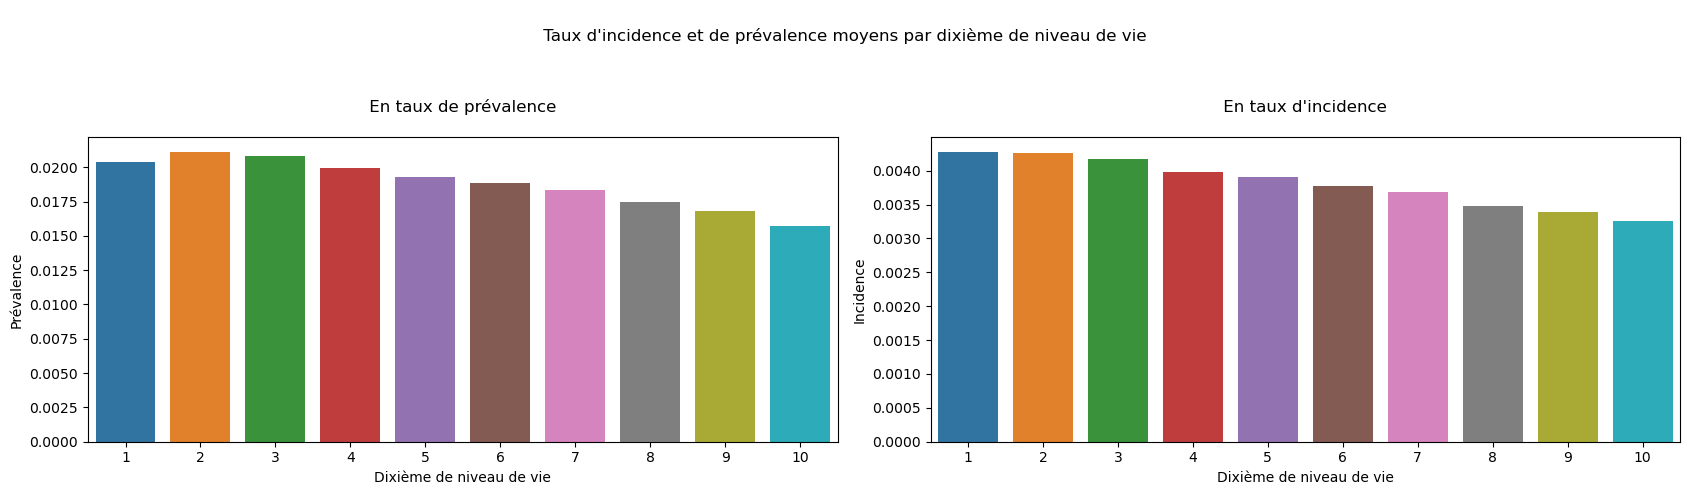

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (17,5))

ax = axes[0]
df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['FISC_REG_S'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = 'valGroupage',
                                    type_donnees = 'prevalence'
                                   )

sns.barplot(data=df_loc, x= "valGroupage" , y="txStandDir", ax = ax)
ax.set_title('\n En taux de prévalence \n')
ax.set_xlabel('Dixième de niveau de vie')
ax.set_ylabel('Prévalence')



ax = axes[1]
df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['FISC_REG_S'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = 'valGroupage',
                                    type_donnees = 'incidence'
                                   )

sns.barplot(data=df_loc, x= "valGroupage" , y="txStandDir", ax = ax)
ax.set_title('\n En taux d\'incidence \n')
ax.set_xlabel('Dixième de niveau de vie')
ax.set_ylabel('Incidence')


fig.suptitle('\n Taux d\'incidence et de prévalence moyens par dixième de niveau de vie \n')
fig.tight_layout()

# sns.despine()
plt.show()

## Le taux d'incidence moyen par groupe socioprofessionnel

/tmp/ipykernel_168/709525157.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


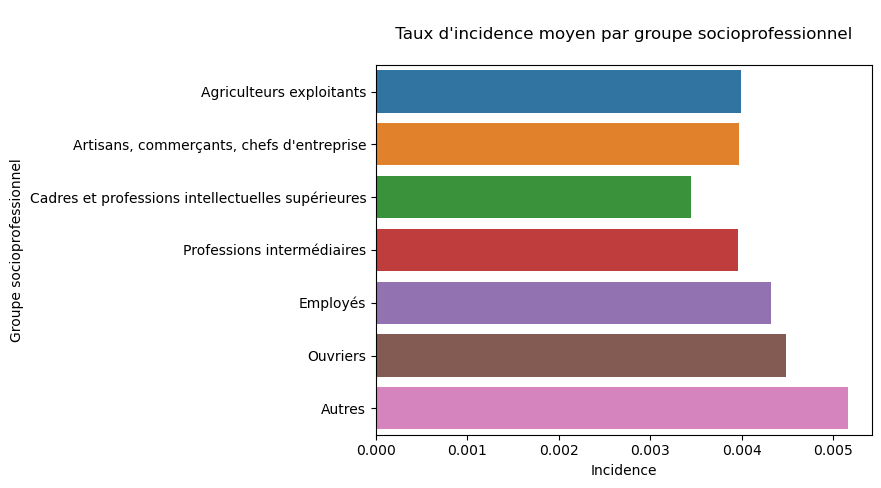

In [12]:
df_loc = selection_variable_barplot(liste_var_groupage = ['EAR_GS_S'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = str,
                                    type_var_partition = float,
                                    groupby = 'valGroupage'
                                   )
df_loc.replace({'valGroupage' : dico_grpes_sociopro}, inplace=True)

# plt.figure(figsize=(10,4))
sns.barplot(data=df_loc, y="valGroupage" , x="txStandDir")
plt.title('\n Taux d\'incidence moyen par groupe socioprofessionnel \n')
plt.ylabel('Groupe socioprofessionnel')
plt.xlabel('Incidence')

# plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')

plt.show()

## Le taux d'incidence moyen par groupe socioprofessionnel mais dynamique !!

In [13]:
df_loc = selection_variable_barplot(liste_var_groupage = ['EAR_GS_S'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = str,
                                    type_var_partition = float,
                                    groupby = 'valGroupage'
                                   )
df_loc.replace({'valGroupage' : dico_grpes_sociopro}, inplace=True)

fig = px.bar(df_loc.sort_values('txStandIndir', ascending=True), orientation='h', x='txStandIndir',
             y='valGroupage', template="plotly_white")

fig.update_layout(
     title='\n Taux d\'incidence moyen par groupe socioprofessionnel \n',
     xaxis_title='Incidence',
     yaxis_title='Groupe socioprofessionnel')
fig.update_xaxes(title_font=dict(color='black'))

HTML(fig.to_html())

/tmp/ipykernel_168/709525157.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


## Comparaison des taux d'incidence moyen par maladie groupe socioprofessionnel

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



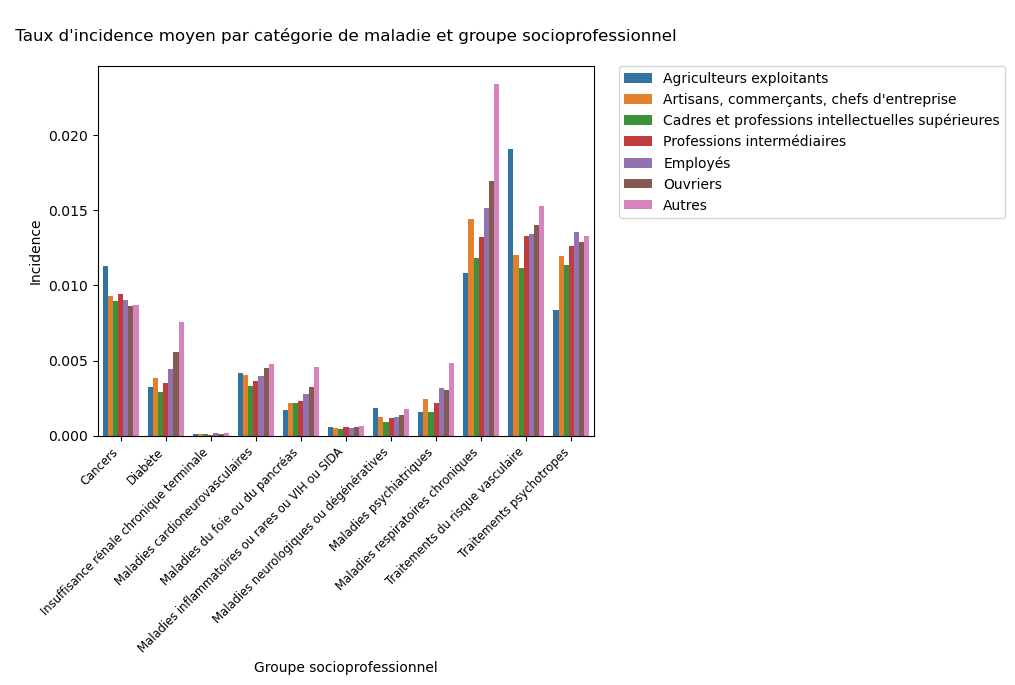

In [14]:
df_loc = selection_variable_barplot(liste_var_groupage = ['EAR_GS_S'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = str,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'catLib']
                                   )
df_loc.replace({'valGroupage' : dico_grpes_sociopro}, inplace=True)

# col = ['Maladies psychiatriques','Diabète','Maladies neurologiques ou dégénératives', 'Maladies du foie ou du pancréas']
# df_loc[df_loc['catLib'].isin(col)]
   
sns.barplot(data=df_loc, x='catLib' , y='txStandDir', hue='valGroupage')
plt.title('\n Taux d\'incidence moyen par catégorie de maladie et groupe socioprofessionnel \n')
plt.xlabel('Groupe socioprofessionnel')
plt.ylabel('Incidence')

plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

 
plt.show()

Un peu moche, peut être représenter seulement les plus fortes disparités? diabete, maladies psy... (mais ordres de grandeur différents donc pas très parlant)

## Comparaison des taux d'incidence moyen par maladie et par sexe

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



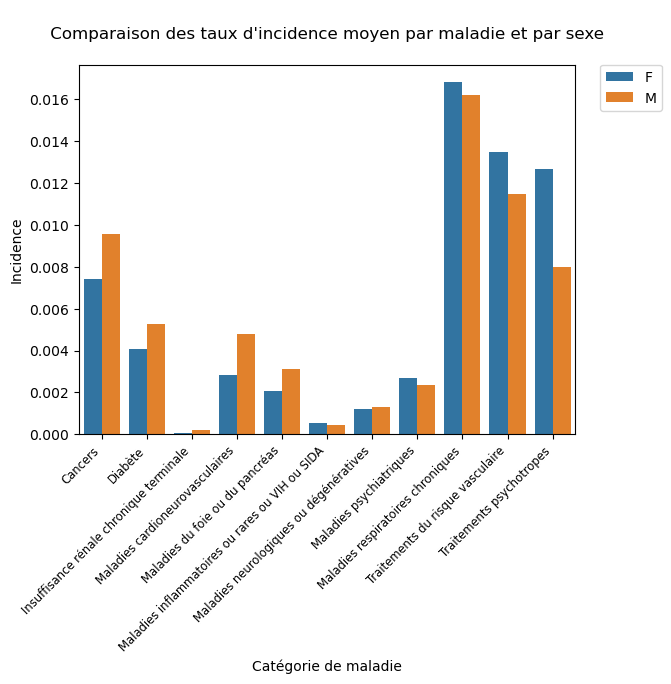

In [15]:
df_loc = selection_variable_barplot(liste_var_groupage = ['SEXE'],
                                    liste_var_partition = ['FISC_REG_S'],
                                    type_var_groupage = float,
                                    type_var_partition = int,
                                    groupby = ['catLib','valGroupage']
                                   )


sns.barplot(data=df_loc, x='catLib' , y='txStandDir', hue='valGroupage')
plt.title('\n Comparaison des taux d\'incidence moyen par maladie et par sexe \n')
plt.xlabel('Catégorie de maladie')
plt.ylabel('Incidence')

plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

 
plt.show()

## On ventile par sexe

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



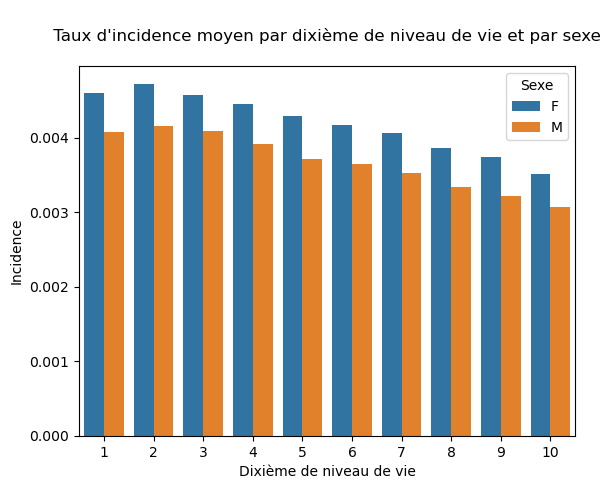

In [16]:
df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'valPartition']
                                   )


df_loc = df_loc.rename(columns = {'valPartition' : 'Sexe'})
sns.barplot(data=df_loc, x= "valGroupage", y="txStandDir", hue = 'Sexe')
plt.title('\n Taux d\'incidence moyen par dixième de niveau de vie et par sexe \n')
plt.xlabel('Dixième de niveau de vie')
plt.ylabel('Incidence')
# sns.despine()
plt.show()

# Importation 2 : La géographie !

In [17]:
# Pour télécharger le fond de carte : https://github.com/gregoiredavid/france-geojson/blob/master/regions-version-simplifiee.geojson'
# A voir si on peut le push sur git, et si on ne peut pas le télécharger automatiquement à chaque fois...

sf = gpd.read_file('regions-version-simplifiee.geojson')
sf

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


code                         nom  \
0    11               Île-de-France   
1    24         Centre-Val de Loire   
2    27     Bourgogne-Franche-Comté   
3    28                   Normandie   
4    32             Hauts-de-France   
5    44                   Grand Est   
6    52            Pays de la Loire   
7    53                    Bretagne   
8    75          Nouvelle-Aquitaine   
9    76                   Occitanie   
10   84        Auvergne-Rhône-Alpes   
11   93  Provence-Alpes-Côte d'Azur   
12   94                       Corse   

                                             geometry  
0   POLYGON ((2.59052 49.07965, 2.63327 49.10838, ...  
1   POLYGON ((2.87463 47.52042, 2.88845 47.50943, ...  
2   POLYGON ((3.62942 46.74946, 3.57569 46.74952, ...  
3   POLYGON ((-1.11962 49.35557, -1.07822 49.38849...  
4   POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...  
5   POLYGON ((4.23316 49.95775, 4.30810 49.96952, ...  
6   MULTIPOLYGON (((-2.45849 47.44812, -2.45343 47...  
7   MULTIPOLYGON (((-3.65914 48.65921, -3.63649 48...  
8   MULTIPOLYGON (((1.41519 46.34722, 1.43538 46.3...  
9   MULTIPOLYGON (((1.78613 42.57362, 1.77316 42.5...  
10  POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...  
11  MULTIPOLYGON (((6.94834 44.65482, 6.96234 44.6...  
12  POLYGON ((9.40227 41.85870, 9.40627 41.82236, ...

Tout d'abord la carte de France et des régions


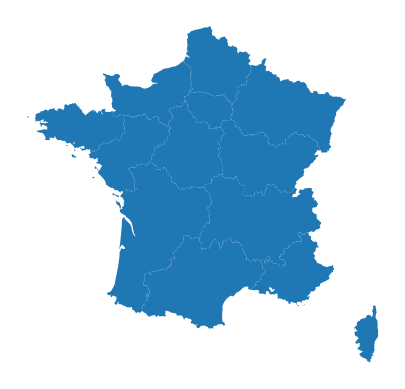

In [18]:
ax = sf.plot()
ax.set_axis_off()
print("Tout d'abord la carte de France et des régions")

# Merge 1 : Les inégalité sociales + la géographie

In [19]:
def merge_inegalites_geographie(liste_var_groupage, type_var_groupage = float, type_donnees = 'incidence') :
    df_loc = selection_variable_barplot(
                            liste_var_groupage = liste_var_groupage,
                            liste_var_partition = ['FISC_REG_S'],
                            type_var_groupage = type_var_groupage,
                            type_var_partition = object,
                            groupby = 'valPartition',
                            type_donnees = type_donnees
                            )
    df_loc_bis = sf.copy().merge(df_loc, left_on = 'code', right_on = 'valPartition', left_index=False, right_index=False, how = 'left')
    
    return df_loc_bis

## Une première carte 

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



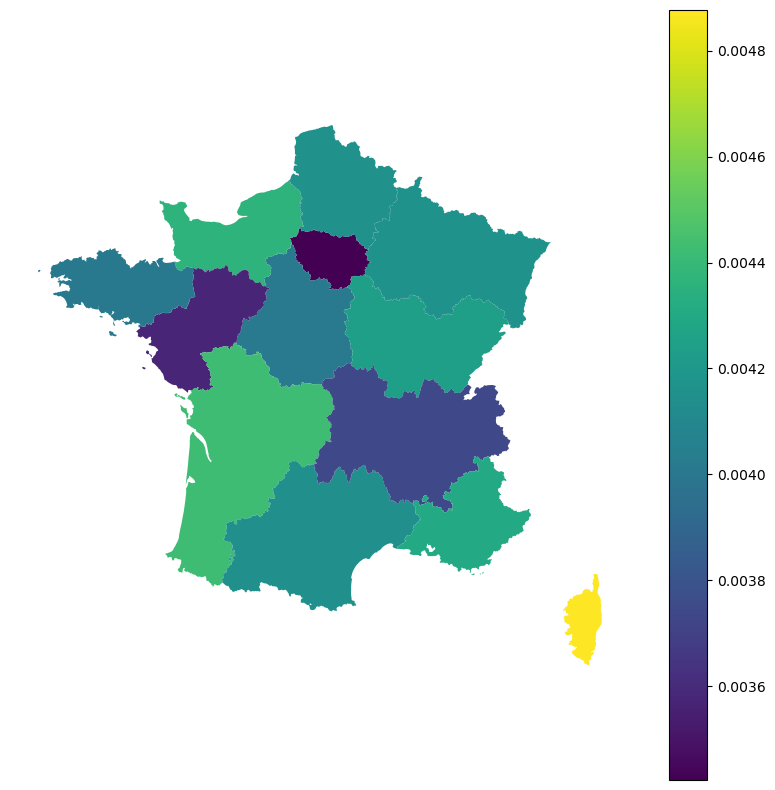

In [20]:
df_merged_par_region = merge_inegalites_geographie(
                                    liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    type_var_groupage = int,
                                    type_donnees = 'incidence'
                                    )


fig,ax = plt.subplots(figsize=(10, 10))
df_merged_par_region.plot(ax = ax, column = "txStandDir", legend=True)
ax.set_axis_off()
ax
plt.show()

/tmp/ipykernel_168/7508282.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<AxesSubplot: >

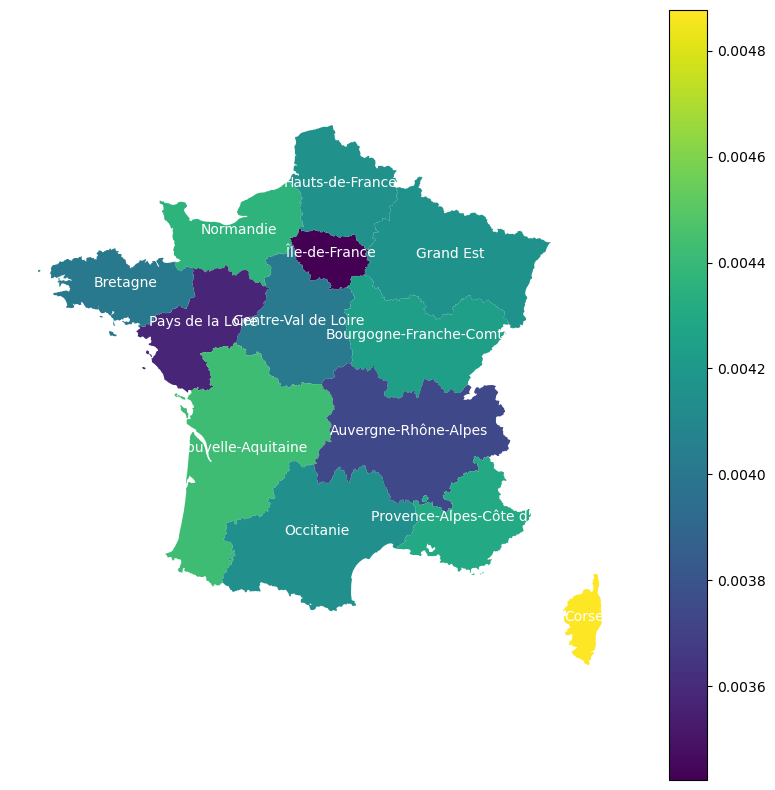

In [21]:
#### EN AJOUTANT LES NOMS DE REGIONS

df_merged_par_region["centre_regions"] = df_merged_par_region.centroid


fig,ax = plt.subplots(figsize=(10, 10))
df_merged_par_region.plot(ax = ax, column = "txStandDir", legend=True)

for num_ligne in range(len(df_merged_par_region)) :
    ligne = df_merged_par_region.iloc[num_ligne]
    x = ligne['centre_regions'].x
    y = ligne['centre_regions'].y
    ax.annotate(ligne["nom"], xy = (x, y), xytext = (0, 0), textcoords="offset points", ha='center', color='white')

ax.set_axis_off()
ax

# for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# Nombre de médecins et d'hôpitaux par région

In [22]:
# Un peu plus compliqué parce que le fichier compte deux sheet : un pour les deps et un pour les régions...
url_insee = "https://www.insee.fr/fr/statistiques/fichier/2012677/TCRD_068.xls"
outfilename = "test.xls"
urllib.request.urlretrieve(url_insee, outfilename) 

('test.xls', <http.client.HTTPMessage at 0x7ff5ed912290>)

In [23]:
df_insee = pd.read_excel('test.xls','REG', header = 4)
df_insee = df_insee.rename(columns = {'Unnamed: 0' : 'Index_region','Unnamed: 1' : 'Nom_region'})
df_insee.head(4)

Index_region               Nom_region  Ensemble des médecins  \
0           84     Auvergne-Rhône-Alpes                27117.0   
1           27  Bourgogne-Franche-Comté                 8373.0   
2           53                 Bretagne                10654.0   
3           24      Centre-Val de Loire                 6844.0   

   Ensemble des médecins.1  dont général.  dont spécial.  Chirurg. dentistes  \
0                    340.0          157.0          183.0                64.0   
1                    297.0          144.0          153.0                50.0   
2                    321.0          159.0          161.0                62.0   
3                    265.0          124.0          141.0                44.0   

   Infirmiers diplômés d’État  Pharm.  
0                      1118.0   117.0  
1                      1065.0   110.0  
2                      1106.0   101.0  
3                       882.0   106.0

# Merge 2 : Les deux tables + le nombre de médecins en régions

In [24]:
df_merged_par_region = merge_inegalites_geographie(
                                    liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    type_var_groupage = int,
                                    type_donnees = 'incidence'
                                    )



/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [25]:
df_merged_par_region_bis = df_merged_par_region.copy().merge(df_insee, left_on = 'code', right_on = 'Index_region', left_index=False, right_index=False, how = 'left')
df_merged_par_region_bis.head(5)

code                      nom  \
0   11            Île-de-France   
1   24      Centre-Val de Loire   
2   27  Bourgogne-Franche-Comté   
3   28                Normandie   
4   32          Hauts-de-France   

                                            geometry valPartition     I_cat  \
0  POLYGON ((2.59052 49.07965, 2.63327 49.10838, ...           11  0.211538   
1  POLYGON ((2.87463 47.52042, 2.88845 47.50943, ...           24  0.211538   
2  POLYGON ((3.62942 46.74946, 3.57569 46.74952, ...           27  0.211538   
3  POLYGON ((-1.11962 49.35557, -1.07822 49.38849...           28  0.211538   
4  POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...           32  0.211538   

   valGroupage       poids1      poidsTot  txNonStand  txStandDir  ...  \
0          5.5  7193.154099  2.223958e+06    0.003319    0.003423  ...   
1          5.5  1838.260355  4.807558e+05    0.003991    0.004014  ...   
2          5.5  2126.875307  5.262577e+05    0.004206    0.004237  ...   
3          5.5  2584.498878  6.222593e+05    0.004337    0.004362  ...   
4          5.5  4496.595969  1.114869e+06    0.004193    0.004155  ...   

   txStandIndirModBH  Index_region               Nom_region  \
0           0.003751            11            Île-de-France   
1           0.004709            24      Centre-Val de Loire   
2           0.004899            27  Bourgogne-Franche-Comté   
3           0.005081            28                Normandie   
4           0.004627            32          Hauts-de-France   

   Ensemble des médecins  Ensemble des médecins.1 dont général. dont spécial.  \
0                48236.0                    396.0         145.0         251.0   
1                 6844.0                    265.0         124.0         141.0   
2                 8373.0                    297.0         144.0         153.0   
3                 9642.0                    288.0         141.0         148.0   
4                18196.0                    302.0         147.0         155.0   

   Chirurg. dentistes  Infirmiers diplômés d’État  Pharm.  
0                73.0                       936.0   113.0  
1                44.0                       882.0   106.0  
2                50.0                      1065.0   110.0  
3                41.0                      1016.0   105.0  
4                48.0                      1026.0   107.0  

[5 rows x 24 columns]

# Une première matrice de corrélation

In [26]:
liste_col_indicateurs = ['txNonStand','txStandDir', 'txStandIndir']
liste_lignes_explicatives = ['Ensemble des médecins', 'Ensemble des médecins.1', 'dont général.','dont spécial.','Chirurg. dentistes',
                             'Infirmiers diplômés d’État','Pharm.']

corr = df_merged_par_region_bis.corr()
corr[liste_col_indicateurs].loc[liste_lignes_explicatives].style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_168/2649832197.py:5: FutureWarning:

The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Quelle variable socio-professionelle est la plus corrélée avec la maladie ?

In [27]:
df_loc = selection_variable_barplot(liste_var_groupage = ['EAR_GS_S'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = str,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'catLib'],
                                    type_donnees = 'prevalence'
                                   )
# df_loc.replace({'valGroupage' : dico_grpes_sociopro}, inplace=True)

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [28]:
list(set(df_drees['varGroupage']))

['EAR_GS_S',
 'EAR_DIPLR_S',
 'classeAge10',
 'SEXE',
 nan,
 'FISC_NIVVIEM_E2015_S_moy_10']

In [71]:
def calcul_correlation_maladies(var_groupage, variable_indic = 'txStandDir', type_donnees = 'prevalence') :
    # Cette fonction renvoie un df :
        # index = maladie
        # colonne = corrélation avec la variable var_groupage du taux
    
    #On récupère le sous_df
    df_loc = selection_variable_barplot(liste_var_groupage = [var_groupage],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'catLib'],
                                    type_donnees = type_donnees
                                   )

    #On modifie la variable des maladies pour pouvoir parcourir
    df_loc = df_loc.astype({'catLib' : 'category'})
    
    if var_groupage == 'classeAge10' :
        #Comme l'âge n'est pas mis sous forme d'entier il faut un petit traitement...
        df_loc['valGroupage'] = 10* df_loc['valGroupage'].apply(lambda x : 2 if x == '<30'
                                else 9 if x == '>=90'
                                else x[0]).astype('int')

    # On calcule les corrélations
    liste_corr = []
    liste_maladies = list(set(df_loc['catLib']))
    for maladie in liste_maladies :
        sous_df = df_loc[df_loc['catLib'] == maladie]
        corr = sous_df[variable_indic].corr(sous_df['valGroupage'])
        liste_corr.append(corr)

    # On met sous forme de DF
    dic = {}
    dic['Maladie'] = liste_maladies
    dic['Corrélation_'+str(var_groupage)] = liste_corr
    return pd.DataFrame(data = dic)

def calcul_toutes_correlations_maladies(liste_var_groupage, variable_indic = 'txStandDir', type_donnees = 'prevalence') :
    # On initialise
    df_correlations = calcul_correlation_maladies(liste_var_groupage[0], variable_indic = variable_indic,  type_donnees = type_donnees)

    # Puis on parcours toutes les maladies
    for var_groupage in liste_var_groupage[1:] :
        sous_df = calcul_correlation_maladies(var_groupage, variable_indic = variable_indic,  type_donnees = type_donnees)
        df_correlations = df_correlations.merge(sous_df, left_on = 'Maladie', right_on = 'Maladie')
    return df_correlations

In [76]:
liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10', 'EAR_GS_S', 'classeAge10', 'EAR_DIPLR_S']

df_recap_correlations = calcul_toutes_correlations_maladies(liste_var_groupage, variable_indic = 'txStandDir', type_donnees = 'prevalence')
df_recap_correlations = df_recap_correlations.set_index('Maladie')
df_recap_correlations = df_recap_correlations.rename(columns = {'Corrélation_FISC_NIVVIEM_E2015_S_moy_10' : 'niveau de vie',
                                                               'Corrélation_EAR_DIPLR_S' : 'niveau de diplômes',
                                                               'Corrélation_classeAge10' : 'classe d\'âge',
                                                               'Corrélation_EAR_GS_S' : 'Indice socioprofessionnel'})

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_168/709525157.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'niveau de vie'),
  Text(1.5, 0, 'Indice socioprofessionnel'),
  Text(2.5, 0, "classe d'âge"),
  Text(3.5, 0, 'niveau de diplômes')])

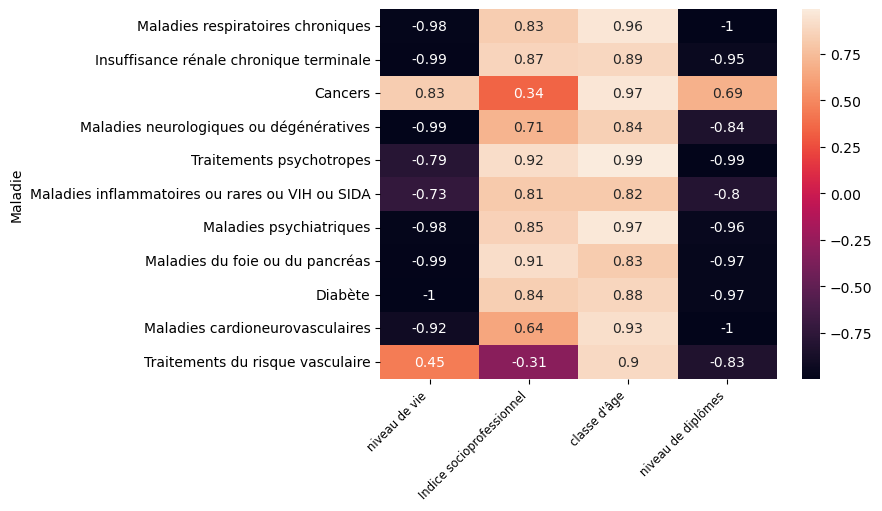

In [77]:
sns.heatmap(df_recap_correlations, annot=True)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')


# Brouillon là-dessous

In [ ]:
import cartiflette.s3

shp_communes = cartiflette.s3.download_vectorfile_url_all(
    values = ["75", "92", "93", "94"],
    level="COMMUNE",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)

shp_communes.head()

ax = shp_communes.plot()
ax.set_axis_off()

In [ ]:
import geopandas as gpd
!pip install contextily
import contextily as ctx

In [ ]:
!pip install geoviews

In [ ]:
pip install typing-extensions --upgrade

In [ ]:
conda install -c pyviz hvplot

In [ ]:
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

gv.extension('bokeh')

In [ ]:
pip install pygal_maps_fr


In [ ]:
import pygal

fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Some departments'
fr_chart.add('Métropole', ['69', '92', '13'])
fr_chart.add('Corse', ['2A', '2B'])
fr_chart.add('DOM COM', ['971', '972', '973', '974'])
fr_chart.render()

In [ ]:
from pygal.maps.fr import aggregate_regions
fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Population by region'
fr_chart.add('In 2011', aggregate_regions({
  '01': 603827, '02': 541302, '03': 342729, '04': 160959, '05': 138605, '06': 1081244, '07': 317277, '08': 283110, '09': 152286, '10': 303997, '11': 359967, '12': 275813, '13': 1975896, '14': 685262, '15': 147577, '16': 352705, '17': 625682, '18': 311694, '19': 242454, '2A': 145846, '2B': 168640, '21': 525931, '22': 594375, '23': 122560, '24': 415168, '25': 529103, '26': 487993, '27': 588111, '28': 430416, '29': 899870, '30': 718357, '31': 1260226, '32': 188893, '33': 1463662, '34': 1062036, '35': 996439, '36': 230175, '37': 593683, '38': 1215212, '39': 261294, '40': 387929, '41': 331280, '42': 749053, '43': 224907, '44': 1296364, '45': 659587, '46': 174754, '47': 330866, '48': 77156, '49': 790343, '50': 499531, '51': 566571, '52': 182375, '53': 307031, '54': 733124, '55': 193557, '56': 727083, '57': 1045146, '58': 218341, '59': 2579208, '60': 805642, '61': 290891, '62': 1462807, '63': 635469, '64': 656608, '65': 229228, '66': 452530, '67': 1099269, '68': 753056, '69': 1744236, '70': 239695, '71': 555999, '72': 565718, '73': 418949, '74': 746994, '75': 2249975, '76': 1251282, '77': 1338427, '78': 1413635, '79': 370939, '80': 571211, '81': 377675, '82': 244545, '83': 1012735, '84': 546630, '85': 641657, '86': 428447, '87': 376058, '88': 378830, '89': 342463, '90': 143348, '91': 1225191, '92': 1581628, '93': 1529928, '94': 1333702, '95': 1180365, '971': 404635, '972': 392291, '973': 237549, '974': 828581, '976': 212645
}))
fr_chart.render()

In [ ]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Some countries'
worldmap_chart.add('F countries', ['fr', 'fi'])
worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
                                   'mk', 'ml', 'mm', 'mn', 'mo',
                                   'mr', 'mt', 'mu', 'mv', 'mw',
                                   'mx', 'my', 'mz'])
worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
worldmap_chart.render()

#### Dictionnaire code régions

In [ ]:
dico_regions = {
    '1' : 'Guadeloupe',
    '2' : 'Martinique',
    '3' : 'Guyane',
    '4' : 'La Réunion',
    '6' : 'Mayotte',
    '11' : 'Ile de France',
    '24' : 'Centre val de Loire',
    '27' : 'Bourgogne Franche-Comté',
    '28' : 'Normandie' ,
    '32' : 'Nord pas de Calais Picardie',
    '44' : 'Alsace Champagne Ardenne Lorraine',
    '52' : 'Pays de la Loire',
    '53' : 'bretagne' ,
    '75' : 'Aquitaine Limousin Poitou-Charentes',
    '76' : 'Langeudoc-Roussillon Midi-Pyrénées' ,
    '84' : 'Auvergne Rhône-Alpes' ,
    '93' : 'Procence Alpes Côte d\'Azur' ,
    '94' : 'Corse'
}

#### Dictionnaire code groupes socioprofessionnels

In [ ]:
dico_grpes_sociopro = {
    '1' : 'Agriculteurs exploitants',
    '2' : 'Artisans, commerçants, chefs d\'entreprise',
    '3' : 'Cadres et professions intellectuelles supérieures',
    '4' : 'Professions intermédiaires',
    '5' : 'Employés',
    '6' : 'Ouvriers',
    '7' : 'Retraités',
    '8' : 'Autres'
}

In [ ]:
set(rawData['valGroupage'])

In [ ]:
def find_nb_modalities(df):
    for col in df.columns:
        if df[col].dtype == 'O':
            print(f'La colonne {col} contient {df[col].nunique()} modalités.')

find_nb_modalities(df_drees)

In [ ]:
def missing_rate(df, substitute='nan'):
    for col in df.columns:
        rate = df[col].isna().sum()/len(df)*100
        if rate != 0:
            print(f'Le taux de NAs de la colonne {col} est {round(rate,2)}%.')

missing_rate(df_drees)

In [ ]:
df_drees[df_drees['varGroupage']=='EAR_GS_S'].valGroupage.unique()
df_drees['valGroupage'].unique()
df_drees[df_drees['valGroupage']=='7']
df_drees[(df_drees['valGroupage']=='7') & (df_drees['varGroupage']=='EAR_GS_S')]
# pas de groupe socioprofessionnel 7 ? (retraités)

In [ ]:
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
sns.boxplot(data=df, x='team', y='rebounds', ax=axes[1,0])
sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])

# Importation données démographie médicale (densité de médecin en 2016 par région et par spécialité)

In [16]:
url_med = "https://drees.shinyapps.io/demographie-ps/_w_de28a71f/session/6af08bf5c961cc555b34f2ef94d6a0ab/download/downloadData?w=de28a71f"
urlData = requests.get(url_med).content
Datamed = pd.read_csv(io.StringIO(urlData.decode('iso-8859-1')), sep = ",")
df_med = Datamed(index="specialite")


TypeError: 'DataFrame' object is not callable